### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [10]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [11]:
from scipy.stats import uniform
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import researchpy as rp 


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [12]:
df = pd.read_csv('C:/Users/Luswata/Dropbox/ML_AI_UCBerkeley/Data/coupons.csv')
df.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [23]:
# Identify and drop any duplicated records
duplicates = df[df.duplicated()]
df.drop_duplicates(inplace=True)
df.shape

(12610, 26)

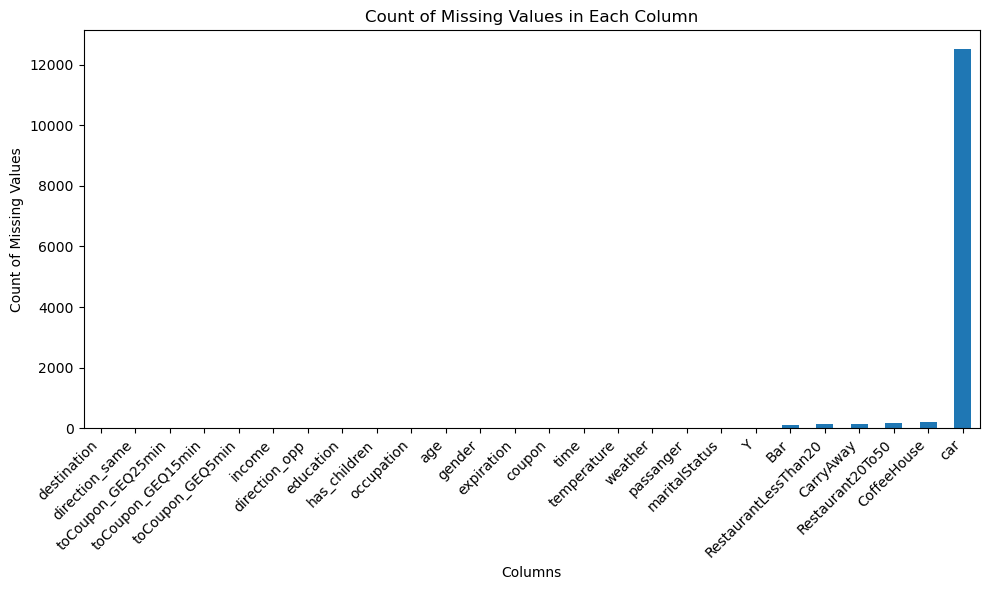

In [24]:
# Check misingness rates 
missing_values_count = df.isnull().sum().sort_values()

plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot (optional)
plt.show()

In [25]:
df.columns[df.columns.str.contains("NaN")]

Index([], dtype='object')

In [41]:
pd.crosstab(df['car'], df['Y'], dropna=False, margins=True)

Y,0,1,All
car,,,
Car that is too old to install Onstar :D,4,17,21.0
Mazda5,6,16,22.0
Scooter and motorcycle,11,11,22.0
crossover,13,8,21.0
do not drive,12,10,22.0
NaN,5407,7095,NaN
All,5453,7157,12610.0


In [42]:
pd.crosstab(df['Bar'], df['Y'], dropna=False, margins=True)

Y,0,1,All
Bar,,,
1~3,935,1533,2468.0
4~8,390,681,1071.0
gt8,147,201,348.0
less1,1502,1936,3438.0
never,2427,2751,5178.0
NaN,52,55,NaN
All,5453,7157,12610.0


In [43]:
pd.crosstab(df['CarryAway'], df['Y'], dropna=False, margins=True) 

Y,0,1,All
CarryAway,,,
1~3,1952,2693,4645.0
4~8,1780,2462,4242.0
gt8,672,900,1572.0
less1,928,921,1849.0
never,71,81,152.0
NaN,50,100,NaN
All,5453,7157,12610.0


In [26]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

In [28]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df['Yvar'] = df['Y'].astype(str)

In [35]:
rp.summary_cont(df['temperature'].groupby(df['Yvar']))

,N,Mean,SD,SE,95% Conf.,Interval
Yvar,,,,,,
0,5453,61.9641,19.3195,0.2616,61.4512,62.4769
1,7157,64.2602,18.9672,0.2242,63.8207,64.6997


In [37]:
# Crosstab of categorical variables with Y 
crosstab = pd.crosstab(df['gender'], df['Yvar'])
print(crosstab)

crosstab1 = pd.crosstab(df['gender'], df['Yvar'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

Yvar       0     1
gender            
Female  2934  3535
Male    2519  3622
Yvar           0         1
gender                    
Female  0.453548  0.546452
Male    0.410194  0.589806
Chi-square statistic: 23.94946158452324
P-value: 9.889794644237712e-07
Degrees of freedom: 1
Expected frequencies table:
 [[2797.41927042 3671.58072958]
 [2655.58072958 3485.41927042]]


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
Missing values in variable car are highly significant hence the variable will be excluded from the analysis while in variables; Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, and CoffeeHouse few values are missing. For this analysis, no imputation will be carried out. The missing values will be replaced with blank or ignored.    

4. What proportion of the total observations chose to accept the coupon? 



In [44]:
rp.summary_cat(df['Y'])

,Variable,Outcome,Count,Percent
0,Y,1,7157,56.76
1,,0,5453,43.24


In [ ]:
From the above table it is observed that 56.8% of the respondents chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

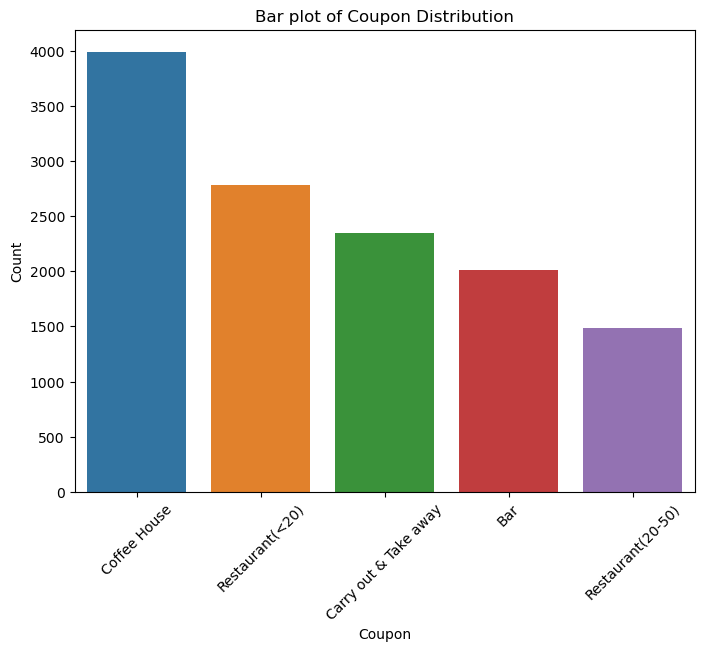

In [46]:
counts = df['coupon'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)

plt.title('Bar plot of Coupon Distribution')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.show()

In [185]:
crosstab = rp.crosstab(df['coupon'], df['Y'], prop= "row")
print(crosstab)

                           Y              
Y                          0      1    All
coupon                                    
Bar                    59.00  41.00  100.0
Carry out & Take away  26.62  73.38  100.0
Coffee House           50.14  49.86  100.0
Restaurant(20-50)      55.85  44.15  100.0
Restaurant(<20)        29.22  70.78  100.0
All                    43.24  56.76  100.0


6. Use a histogram to visualize the temperature column.

C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


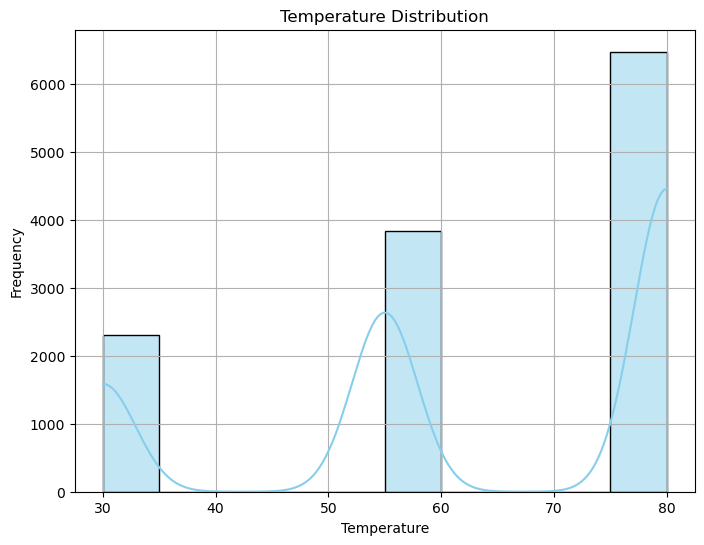

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='temperature', bins=10, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
Temperature is multimodal

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [96]:
bar = df.query("coupon == 'Bar'")
bar.sample(5)
#bar.shape

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Yvar
3267,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Married partner,...,1~3,less1,less1,1,1,1,0,1,0,0
227,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,1~3,1~3,1,1,0,0,1,1,1
11974,Work,Alone,Snowy,30,7AM,Bar,1d,Male,50plus,Married partner,...,1~3,1~3,less1,1,1,1,0,1,1,1
1958,Work,Alone,Sunny,55,7AM,Bar,1d,Male,41,Married partner,...,4~8,1~3,less1,1,1,1,0,1,1,1
6092,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,21,Unmarried partner,...,1~3,1~3,never,1,0,0,0,1,1,1


2. What proportion of bar coupons were accepted?


In [57]:
rp.summary_cat(bar['Y'])

,Variable,Outcome,Count,Percent
0,Y,0,1186,59.0
1,,1,824,41.0


In [ ]:
From the above table, 41% of the bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [97]:
# collapse Bar categories into  Never, 3 or fewer times and 4 or more
bar['Bar_new'] = bar['Bar']
bar['Bar_new'] = bar['Bar_new'].replace({'1~3': '3 or fewer'})
bar['Bar_new'] = bar['Bar_new'].replace({'less1': '3 or fewer'})
bar['Bar_new'] = bar['Bar_new'].replace({'4~8': '4 or more'})
bar['Bar_new'] = bar['Bar_new'].replace({'gt8': '4 or more'})

crosstab = pd.crosstab(bar['Bar'], bar['Bar_new'])
print(crosstab)

Bar_new  3 or fewer  4 or more  never
Bar                                  
1~3             397          0      0
4~8               0        150      0
gt8               0         49      0
less1           563          0      0
never             0          0    830


C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\1390118843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['Bar_new'] = bar['Bar']
C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\1390118843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['Bar_new'] = bar['Bar_new'].replace({'1~3': '3 or fewer'})
C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\1390118843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [99]:
crosstab = pd.crosstab(bar['Bar_new'], bar['Yvar'])
print(crosstab)

crosstab1 = rp.crosstab(bar['Bar_new'], bar['Yvar'], prop= "row")
crosstab1

Yvar          0    1
Bar_new             
3 or fewer  453  507
4 or more    46  153
never       674  156


Yvar              
Yvar            0      1    All
Bar_new                        
3 or fewer  47.19  52.81  100.0
4 or more   23.12  76.88  100.0
never       81.20  18.80  100.0
All         58.97  41.03  100.0

In [ ]:
 The acceptance rate among those who went to a bar 3 or fewer times a month was 52.8% compared to 76.9% of those who went more than 3 times. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [101]:
# convert age to numeric and create a new variable for drivers who go to a bar more than once a month and are over the age of 25 
bar = df.query("coupon == 'Bar'")

bar['age_num'] = bar['age'].replace({'below21': '20', '50plus': '51'}).astype(int)

# Create 'Go_To_Bar_Over_25' variable
bar['Go_To_Bar_Over_25'] = ((bar['age_num'] > 25) & ((bar['Bar'] == "1~3") | (bar['Bar'] == "4~8") | (bar['Bar'] == "gt8"))).astype(int)
#bar.sample(10)


C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\3099673347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['age_num'] = bar['age'].replace({'below21': '20', '50plus': '51'}).astype(int)
C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\3099673347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['Go_To_Bar_Over_25'] = ((bar['age_num'] > 25) & ((bar['Bar'] == "1~3") | (bar['Bar'] == "4~8") | (bar['Bar'] == "gt8"))).astype(int)


In [102]:
bar['Bar'].value_counts()

Bar
never    830
less1    563
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [103]:
count_age_gt_25 = (bar['age_num'] > 25).sum()

# Print the count
print("Count of rows where age is greater than 25:", count_age_gt_25)

Count of rows where age is greater than 25: 1506


In [104]:
crosstab = rp.crosstab(bar['Go_To_Bar_Over_25'], bar['Yvar'])
print(crosstab)

crosstab1 = rp.crosstab(bar['Go_To_Bar_Over_25'], bar['Yvar'], prop= "row")
print(crosstab1)


                   Yvar           
Yvar                  0    1   All
Go_To_Bar_Over_25                 
0                  1058  532  1590
1                   128  292   420
All                1186  824  2010
                    Yvar              
Yvar                   0      1    All
Go_To_Bar_Over_25                     
0                  66.54  33.46  100.0
1                  30.48  69.52  100.0
All                59.00  41.00  100.0


In [ ]:
The acceptance rate among drivers who go to a bar more than once a month and are over the age of 25 was 69.5% while it was 33.5% among all others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [113]:
bar = df.query("coupon == 'Bar'")

bar['passenger_occup'] = ( ((bar['Bar'] == "1~3") | (bar['Bar'] == "4~8") | (bar['Bar'] == "gt8")) & (bar['passanger']!="Kid(s)") & (~bar['occupation'].isin(["Farming Fishing & Forestry", 'Farming', 'Fishing', 'Forestry']))).astype(int)

#crosstab1 = rp.crosstab(bar['occupation'], bar['passenger_occup'])
#print(crosstab1)

#crosstab = rp.crosstab(bar['passanger'], bar['passenger_occup'])
#print(crosstab)

crosstab = rp.crosstab(bar['passenger_occup'], bar['Yvar'])
print(crosstab)

crosstab1 = rp.crosstab(bar['passenger_occup'], bar['Yvar'], prop= "row")
print(crosstab1)


                 Yvar           
Yvar                0    1   All
passenger_occup                 
0                1028  431  1459
1                 158  393   551
All              1186  824  2010
                  Yvar              
Yvar                 0      1    All
passenger_occup                     
0                70.46  29.54  100.0
1                28.68  71.32  100.0
All              59.00  41.00  100.0


C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\2301232908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['passenger_occup'] = ( ((bar['Bar'] == "1~3") | (bar['Bar'] == "4~8") | (bar['Bar'] == "gt8")) & (bar['passanger']!="Kid(s)") & (~bar['occupation'].isin(["Farming Fishing & Forestry", 'Farming', 'Fishing', 'Forestry']))).astype(int)


In [ ]:
The acceptance rate among drivers who went to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry was 71.3% while it was 29.5% among all others.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [122]:
bar = df.query("coupon == 'Bar'")
bar['age_num'] = bar['age'].replace({'below21': '20', '50plus': '51'}).astype(int)

bar['driver_1'] = ( ((bar['Bar'] == "1~3") | (bar['Bar'] == "4~8") | (bar['Bar'] == "gt8")) & (bar['passanger']!="Kid(s)") & (~bar['maritalStatus'].isin(["Widowed", 'Widower']))).astype(int)
bar['driver_2'] = ((bar['age_num'] < 30) & ((bar['Bar'] == "1~3") | (bar['Bar'] == "4~8") | (bar['Bar'] == "gt8"))).astype(int)
bar['driver_3'] = ( ( (bar['RestaurantLessThan20'] == "4~8") | (bar['RestaurantLessThan20'] == "gt8")) & ( (bar['income'] == "Less than $12500") | (bar['income'] == "$12500 - $24999") | (bar['income'] == "$25000 - $37499") | (bar['income'] == "$37500 - $49999"))).astype(int)

bar['ans_6'] = ((bar['driver_1'] ==1) | (bar['driver_2'] ==1) | (bar['driver_3'] ==1)).astype(int)

crosstab_d1 = rp.crosstab(bar['driver_1'], bar['Yvar'], prop= "row")
print(crosstab_d1)

crosstab_d2 = rp.crosstab(bar['driver_2'], bar['Yvar'], prop= "row")
print(crosstab_d2)

crosstab_d3 = rp.crosstab(bar['driver_3'], bar['Yvar'], prop= "row")
print(crosstab_d3)


crosstab = rp.crosstab(bar['ans_6'], bar['Yvar'])
print(crosstab)

crosstab1 = rp.crosstab(bar['ans_6'], bar['Yvar'], prop= "row")
print(crosstab1)

           Yvar              
Yvar          0      1    All
driver_1                     
0         70.46  29.54  100.0
1         28.68  71.32  100.0
All       59.00  41.00  100.0
           Yvar              
Yvar          0      1    All
driver_2                     
0         65.47  34.53  100.0
1         27.83  72.17  100.0
All       59.00  41.00  100.0
           Yvar              
Yvar          0      1    All
driver_3                     
0         59.90  40.10  100.0
1         54.65  45.35  100.0
All       59.00  41.00  100.0
       Yvar           
Yvar      0    1   All
ans_6                 
0       867  367  1234
1       319  457   776
All    1186  824  2010
        Yvar              
Yvar       0      1    All
ans_6                     
0      70.26  29.74  100.0
1      41.11  58.89  100.0
All    59.00  41.00  100.0


C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\545524317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['age_num'] = bar['age'].replace({'below21': '20', '50plus': '51'}).astype(int)
C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\545524317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['driver_1'] = ( ((bar['Bar'] == "1~3") | (bar['Bar'] == "4~8") | (bar['Bar'] == "gt8")) & (bar['passanger']!="Kid(s)") & (~bar['maritalStatus'].isin(["Widowed", 'Widower']))).astype(int)
C:\Users\L

In [ ]:
The acceptance rate among those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed was 71.3% while 
for those drivers who go to bars more than once a month and are under the age of 30 was 72.2% and for those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K was 45.4%. 

The acceptance rate among those drivers who belonged to at least one of the 3 categories above was 58.9%.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
H0: Drivers who go to a bar more than 3 times a month are less likely to accept bar coupons compared to drivers who go to a bar 3 or fewer times a month.

H0: Drivers aged 25 and older who go to a bar more than once a month are less likely to accept bar coupons compared to all others.

H0: Drivers who go to bars more than once a month with passengers otherthan a kid and are in occupations other than farming, fishing, or forestry are less likely to accept bar coupons compared to all others.

H0: Drivers who go to bars more than once a month with passengers otherthan a kid and are not widowed are less likely to accept bar coupons compared to all others.

H0: Drivers aged below 30 years who go to bars more than once a month are less likely to accept bar coupons compared to all others.

H0: Drivers who go to cheap restaurants more than 4 times a month and earn an income less than 50K are less likely to accept bar coupons compared to all others.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [124]:
# Selecting Coffee House coupon category

ch = df.query("coupon == 'Coffee House'")
ch.sample(10)
#ch.shape

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Yvar
1692,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,never,1,0,0,0,1,0,0
9812,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,Single,...,4~8,1~3,less1,1,1,0,0,1,0,0
364,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,31,Married partner,...,4~8,4~8,4~8,1,1,0,0,1,0,0
182,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,...,4~8,1~3,less1,1,1,0,0,1,1,1
7888,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Male,26,Married partner,...,4~8,4~8,less1,1,0,0,0,1,1,1
3988,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,36,Single,...,gt8,gt8,1~3,1,0,0,0,1,0,0
4741,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,below21,Single,...,NaN,4~8,less1,1,1,0,0,1,1,1
1176,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Married partner,...,4~8,gt8,4~8,1,1,0,0,1,0,0
8875,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,26,Single,...,4~8,1~3,less1,1,1,0,0,1,1,1
5006,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,31,Married partner,...,1~3,gt8,1~3,1,1,0,0,1,1,1


In [182]:
rp.summary_cat(ch['Y'])

,Variable,Outcome,Count,Percent
0,Y,0,2000,50.14
1,,1,1989,49.86


Variable: destination
Counts:
Yvar               0     1
destination               
Home             591   335
No Urgent Place  903  1247
Work             506   407

Row Percentages:
Yvar                     0          1
destination                          
Home             63.822894  36.177106
No Urgent Place  42.000000  58.000000
Work             55.421687  44.578313

P-value: 2.2662386722246014e-30


<Figure size 800x600 with 0 Axes>

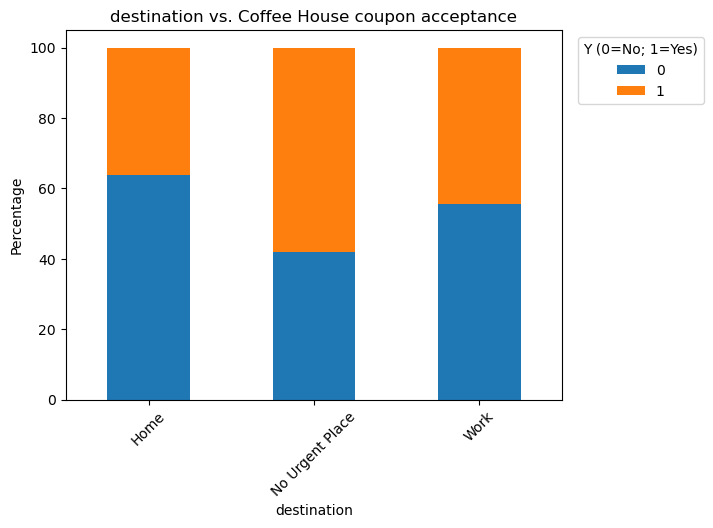

Variable: expiration
Counts:
Yvar           0     1
expiration            
1d           735  1028
2h          1265   961

Row Percentages:
Yvar                0          1
expiration                      
1d          41.690301  58.309699
2h          56.828392  43.171608

P-value: 2.948882864783726e-21


<Figure size 800x600 with 0 Axes>

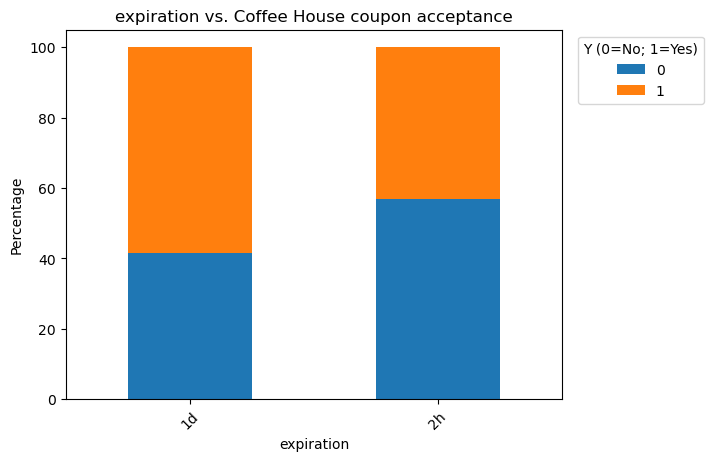

Variable: time
Counts:
Yvar    0    1
time          
10AM  323  575
10PM  171  126
2PM   359  434
6PM   641  447
7AM   506  407

Row Percentages:
Yvar          0          1
time                      
10AM  35.968820  64.031180
10PM  57.575758  42.424242
2PM   45.271122  54.728878
6PM   58.915441  41.084559
7AM   55.421687  44.578313

P-value: 4.038267750080238e-27


<Figure size 800x600 with 0 Axes>

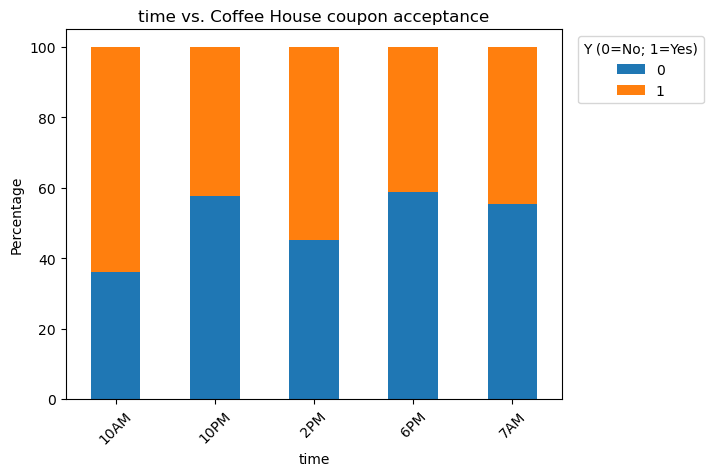

Variable: occupation
Counts:
Yvar                                         0    1
occupation                                         
Architecture & Engineering                  28   35
Arts Design Entertainment Sports & Media   103  106
Building & Grounds Cleaning & Maintenance    3    8
Business & Financial                        76   70
Community & Social Services                 48   26
Computer & Mathematical                    223  223
Construction & Extraction                   24   22
Education&Training&Library                 167  129
Farming Fishing & Forestry                   5    6
Food Preparation & Serving Related          46   37
Healthcare Practitioners & Technical        19   55
Healthcare Support                          25   40
Installation Maintenance & Repair           19   25
Legal                                       43   26
Life Physical Social Science                32   29
Management                                 161  133
Office & Administrative Support    

<Figure size 800x600 with 0 Axes>

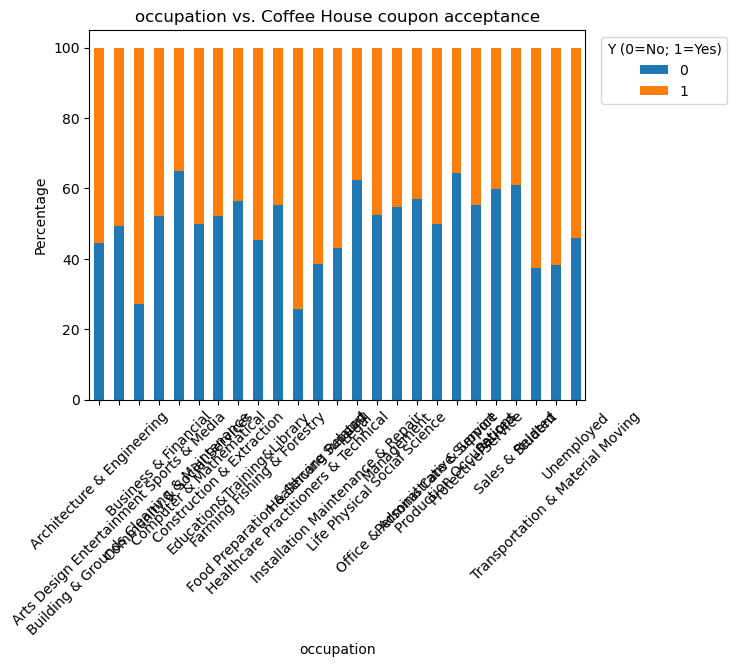

Variable: income
Counts:
Yvar                0    1
income                    
$100000 or More   270  261
$12500 - $24999   273  321
$25000 - $37499   337  303
$37500 - $49999   270  320
$50000 - $62499   272  276
$62500 - $74999   155  120
$75000 - $87499   166   70
$87500 - $99999   119  148
Less than $12500  138  170

Row Percentages:
Yvar                      0          1
income                                
$100000 or More   50.847458  49.152542
$12500 - $24999   45.959596  54.040404
$25000 - $37499   52.656250  47.343750
$37500 - $49999   45.762712  54.237288
$50000 - $62499   49.635036  50.364964
$62500 - $74999   56.363636  43.636364
$75000 - $87499   70.338983  29.661017
$87500 - $99999   44.569288  55.430712
Less than $12500  44.805195  55.194805

P-value: 4.5485639987151694e-10


<Figure size 800x600 with 0 Axes>

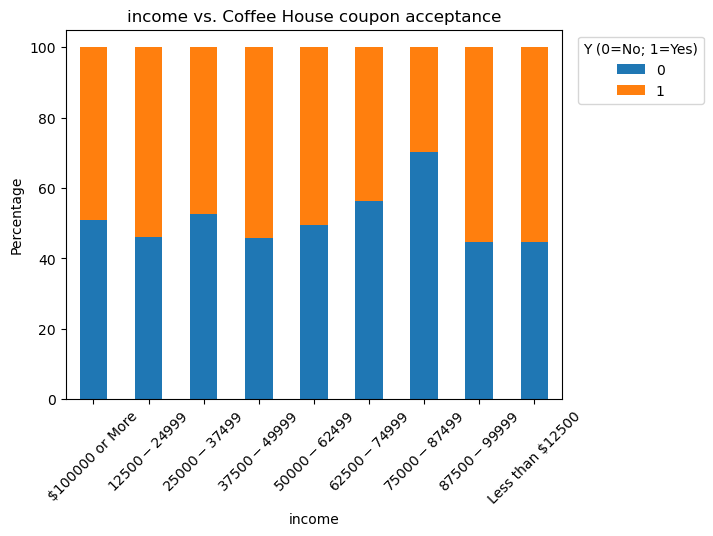

In [177]:
def categorical_analysis(ch, categorical_vars):
    for cat_var in categorical_vars:
        # Compute counts and row percentages
        crosstab = pd.crosstab(ch[cat_var], ch['Yvar'])
        row_percentages = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

        # Compute chi-square test
        chi2, p, _, _ = chi2_contingency(crosstab)

        # Print results
        print(f"Variable: {cat_var}")
        print("Counts:")
        print(crosstab)
        print("\nRow Percentages:")
        print(row_percentages)
        print("\nP-value:", p)

        # Plot bar graph
        plt.figure(figsize=(8, 6))
        row_percentages.plot(kind='bar', stacked=True)
        plt.xticks(rotation=45)
        plt.title(f'{cat_var} vs. Coffee House coupon acceptance')
        plt.xlabel(cat_var)
        plt.ylabel('Percentage')
        plt.legend(title='Y (0=No; 1=Yes)', loc='upper right', bbox_to_anchor=(1.30, 1))
        plt.show()

# List of categorical variables
categorical_vars = ['destination', 'expiration', 'time', 'occupation', 'income', 'education', 'CoffeeHouse' ]

# Call the function
categorical_analysis(ch, categorical_vars)

In [131]:
pip install dtreeviz graphviz scikit-learn

   ---------------------------------------- 0.0/91.8 kB ? eta -:--:--
   ----------------------------------- ---- 81.9/91.8 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 91.8/91.8 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt
from IPython.display import Image  


# Define features and target variable
X = ch[['destination', "temperature", "time", "expiration", "gender", "maritalStatus", "education", "occupation", "income", "RestaurantLessThan20"]]  # Features
y = ch['Y']  # Target variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)


# Initialize the DecisionTreeClassifier with pruning parameters
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=72)

# Fit the model
clf.fit(X_train, y_train)

# Display the pruned decision tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- destination_No Urgent Place <= 0.50
|   |--- expiration_2h <= 0.50
|   |   |--- time_6PM <= 0.50
|   |   |   |--- class: 1
|   |   |--- time_6PM >  0.50
|   |   |   |--- class: 0
|   |--- expiration_2h >  0.50
|   |   |--- temperature <= 67.50
|   |   |   |--- class: 0
|   |   |--- temperature >  67.50
|   |   |   |--- class: 0
|--- destination_No Urgent Place >  0.50
|   |--- occupation_Student <= 0.50
|   |   |--- income_$75000 - $87499 <= 0.50
|   |   |   |--- class: 1
|   |   |--- income_$75000 - $87499 >  0.50
|   |   |   |--- class: 0
|   |--- occupation_Student >  0.50
|   |   |--- education_Associates degree <= 0.50
|   |   |   |--- class: 1
|   |   |--- education_Associates degree >  0.50
|   |   |   |--- class: 1



In [ ]:
For independent exploration I will consider the the predictor spaces below derived from the classification/decision tree:

(destination ==No Urgent Place) X (time at or before 6PM) X (expiration == 2h)
(destination ==No Urgent Place) X (income outside the range "$75000 - $87499") X (occupation not Student)
(destination ==No Urgent Place) X (occupation == Student)


In [172]:
ch = df.query("coupon == 'Coffee House'")

ch['ans_7a'] = ( (ch['destination']=="No Urgent Place") & (ch['time']!= "10PM") & (ch['expiration'] == "2h") ).astype(int)

ch['ans_7b'] = ( (ch['destination']=="No Urgent Place") & (ch['income']!= "$75000 - $87499") & (ch['occupation']!= "Student")  ).astype(int)

ch['ans_7c'] = ( (ch['destination']=="No Urgent Place")  & (ch['occupation']== "Student")  ).astype(int)

ch['ans_7'] = ((ch['ans_7a'] ==1) | (ch['ans_7b'] ==1) | (ch['ans_7c'] ==1) ).astype(int)


crosstab_d1 = rp.crosstab(ch['destination'], ch['Yvar'], prop= "row")
print(crosstab_d1)

crosstab_d2 = rp.crosstab(ch['time'], ch['Yvar'], prop= "row")
print(crosstab_d2)

crosstab_d3 = rp.crosstab(ch['expiration'], ch['Yvar'], prop= "row")
print(crosstab_d3)

crosstab_d4 = rp.crosstab(ch['occupation'], ch['Yvar'], prop= "row")
print(crosstab_d4)

crosstab_d5 = rp.crosstab(ch['income'], ch['Yvar'], prop= "row")
print(crosstab_d5)



crosstab_7a = rp.crosstab(ch['ans_7a'], ch['Yvar'])
print(crosstab_7a)

crosstab_7a1 = rp.crosstab(ch['ans_7a'], ch['Yvar'], prop= "row")
print(crosstab_7a1)


crosstab_7b = rp.crosstab(ch['ans_7b'], ch['Yvar'])
print(crosstab_7b)

crosstab_7b1 = rp.crosstab(ch['ans_7b'], ch['Yvar'], prop= "row")
print(crosstab_7b1)


crosstab_7c = rp.crosstab(ch['ans_7c'], ch['Yvar'])
print(crosstab_7c)

crosstab_7c1 = rp.crosstab(ch['ans_7c'], ch['Yvar'], prop= "row")
print(crosstab_7c1)


crosstab_7 = rp.crosstab(ch['ans_7'], ch['Yvar'])
print(crosstab_7)

crosstab_7r = rp.crosstab(ch['ans_7'], ch['Yvar'], prop= "row")
print(crosstab_7r)




                  Yvar              
Yvar                 0      1    All
destination                         
Home             63.82  36.18  100.0
No Urgent Place  42.00  58.00  100.0
Work             55.42  44.58  100.0
All              50.14  49.86  100.0
       Yvar              
Yvar      0      1    All
time                     
10AM  35.97  64.03  100.0
10PM  57.58  42.42  100.0
2PM   45.27  54.73  100.0
6PM   58.92  41.08  100.0
7AM   55.42  44.58  100.0
All   50.14  49.86  100.0
             Yvar              
Yvar            0      1    All
expiration                     
1d          41.69  58.31  100.0
2h          56.83  43.17  100.0
All         50.14  49.86  100.0
                                         Yvar              
Yvar                                        0      1    All
education                                                  
Associates degree                       48.29  51.71  100.0
Bachelors degree                        53.72  46.28  100.0
Graduate degree

C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\3045245103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\3045245103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\3045245103.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
The acceptance rate of Coffee House coupons was highest among students who had no urgent place to be (73.3%) followed by non-students earning outside the range $75000 - $87499 and had no urgent place to be (57.4%). For coupons expiring within 2 hours, drivers who had no Urgent Place to go at or before 6pm were accepted at a rate of 53.3%.

The acceptance rate among those drivers who belonged to at least one of the 3 categories above was 58.6%.

In [180]:
# SENSITIVITY ANALYSIS: Adding number of times been to the coffee house and gender to key predictor variables

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt
from IPython.display import Image  


# Define features and target variable
X = ch[['destination', "time", "expiration", "occupation", "income", "gender", "CoffeeHouse"]]  # Features
y = ch['Y']  # Target variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)


# Initialize the DecisionTreeClassifier with pruning parameters
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=72)

# Fit the model
clf.fit(X_train, y_train)

# Display the pruned decision tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- CoffeeHouse_never <= 0.50
|   |--- destination_No Urgent Place <= 0.50
|   |   |--- expiration_2h <= 0.50
|   |   |   |--- class: 1
|   |   |--- expiration_2h >  0.50
|   |   |   |--- class: 0
|   |--- destination_No Urgent Place >  0.50
|   |   |--- CoffeeHouse_less1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- CoffeeHouse_less1 >  0.50
|   |   |   |--- class: 1
|--- CoffeeHouse_never >  0.50
|   |--- income_$50000 - $62499 <= 0.50
|   |   |--- income_$37500 - $49999 <= 0.50
|   |   |   |--- class: 0
|   |   |--- income_$37500 - $49999 >  0.50
|   |   |   |--- class: 0
|   |--- income_$50000 - $62499 >  0.50
|   |   |--- occupation_Office & Administrative Support <= 0.50
|   |   |   |--- class: 0
|   |   |--- occupation_Office & Administrative Support >  0.50
|   |   |   |--- class: 0



In [181]:
# Testing the predictor space: (Ever been at the coffee house) X (expiration > 2h) X (destination !=No Urgent Place) 

ch = df.query("coupon == 'Coffee House'")

ch['ans_8'] = ( (ch['CoffeeHouse']!= "never") & (ch['destination']!="No Urgent Place") &  (ch['expiration'] != "2h") ).astype(int)


crosstab_8a = rp.crosstab(ch['ans_8'], ch['Yvar'])
print(crosstab_8a)

crosstab_8b = rp.crosstab(ch['ans_8'], ch['Yvar'], prop= "row")
print(crosstab_8b)


       Yvar            
Yvar      0     1   All
ans_8                  
0      1787  1629  3416
1       213   360   573
All    2000  1989  3989
        Yvar              
Yvar       0      1    All
ans_8                     
0      52.31  47.69  100.0
1      37.17  62.83  100.0
All    50.14  49.86  100.0


C:\Users\Luswata\AppData\Local\Temp\ipykernel_11020\377198769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
The acceptance rate of coffee house coupons expiring within a day among drivers heading to work or home and have ever been to a coffee house was 62.8%.